# Clustering

## Data Ingestion

In [1]:
import pandas as pd
import numpy as np

In [2]:
customer = pd.read_excel('mazda_dataset.xlsx')
zip_met = pd.read_csv("zip_metric.csv")
tags = pd.read_csv("tags_cust_proc")
chimp = pd.read_csv("chimp_global_cust").drop('Unnamed: 0', axis = 1)

In [3]:
tags.fillna(0,inplace = True)

In [4]:
chimp['Chimp_member_rating'].fillna(2, inplace= True)
chimp.fillna(0, inplace= True)

In [112]:
zip_met.columns

Index(['Unnamed: 0', 'location', 'age_lt18_pt', 'age_18-65_pt', 'age_gt65_pt',
       'age_avg', 'single_pt', 'maried_pt', 'widow_pt', 'divorced_pt',
       'belgian_pt', 'alien_pt', 'residential_pt', 'industry_pt',
       'exploitation_pt', 'commercial_pt', 'public_pt', 'mixte_pt',
       'transport_pt', 'infra_pt', 'leasure_pt', 'salaried_pt',
       'working_outside_pt', 'superior_degree_pt', 'independant_pt',
       'idleness_pt', 'pop_density', 'family_size', 'owner_renter_pt',
       'avg_wage', 'province', 'postal_code'],
      dtype='object')

In [113]:
zip_met = zip_met.drop(['Unnamed: 0', 'age_gt65_pt', 'widow_pt','mixte_pt'], axis=1)

In [114]:
customer['Country_I'].value_counts()

Belgium       1702
Luxembourg     179
Name: Country_I, dtype: int64

In [115]:
customer = customer[customer['Country_I']=='Belgium']

In [116]:
customer['Postal Code'] = pd.to_numeric(customer['Postal Code'])

In [117]:
enriched = customer[['Email Address','Postal Code', 'Contact Row ID', "Own(ed) a Mazda"]]
enriched['FRA'] = customer['Preferred Language'] == 'FRA'
enriched['Sexe'] = pd.to_numeric(customer['Personal Title_I'] == 'Mr') + \
        pd.to_numeric(customer['Personal Title_I'] == 'Family')/2
enriched['Own(ed) a Mazda'] = np.where(enriched['Own(ed) a Mazda'] == "Y",1,0)

/home/charly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/charly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/charly/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [118]:
# Enrich the dataset with open data from the zip code
enriched = enriched.merge(zip_met, right_on='postal_code', left_on='Postal Code')

In [119]:
# Enrich the dataset with chimp data
enriched = enriched.merge(chimp.drop_duplicates('Email Address'), \
                          how = 'left',right_on='Email Address', left_on='Email Address')

In [120]:
# Enrich the dataset with tags data
enriched = enriched.merge(tags.drop_duplicates('Email Address'), \
                          how = 'left',right_on='Email Address', left_on='Email Address')

In [121]:
# For clustering purpose, we cannot have missing values.
Columns_to_fill_with_O = ['Chimp_Total_Emails','Chimp_opened_once', 'Chimp_opened_multi', 'Chimp_not_opened',\
          'Chimp_clicks', '24h_of_zolder', 'accessories', 'all-in_arrangement',
       'automatic_mirrors', 'barcelona', 'brake_and_drifting_course',
       'brochure', 'car', 'car_check-up', 'car_show', 'celebrities',
       'christmas', 'citytrip', 'contest', 'cx-3', 'cx-5', 'diesel',
       'drifting', 'driving_courses', 'emission', 'europe_service',
       'extra_offer', 'family_car', 'festival', 'football', 'future_models',
       'ginza', 'infinity', 'invitation', 'japan', 'kai_concept', 'launch',
       'low_emission_zone', 'maintenance', 'mazda2', 'mazda3', 'mazda6',
       'mazda_6', 'mazda_brand_center', 'mazda_brand_space', 'mazda_de-icer',
       'mazda_mania', 'mazda_match', 'mazda_winter_screen_wash', 'mazdamania',
       'musketon', 'mx-5', 'mx-5_rf', 'new_model', 'open_air_b&b',
       'parking_camera', 'preview', 'q30', 'q60', 'qx30', 'qx70', 'racing',
       'roofbox', 'samsonite', 'show_days', 'showroom', 'skydrive', 'snow',
       'soft_top_cleaner', 'soft_top_coating', 'special_conditions',
       'speciale_conditions', 'sport', 'summer', 'summer_deal', 'survey',
       'test_drive', 'testtrip', 'thank_you', 'the_sound_of_tomorrow', 'tips',
       'tomorrowland', 'tour', 'training', 'vacation', 'video', 'vision_coupé',
       'winter', 'winter_tires', 'winter_wheels', 'world_car_of_the_year']


enriched[Columns_to_fill_with_O] = enriched[Columns_to_fill_with_O].fillna(0)

enriched['Chimp_member_rating'].fillna(2, inplace= True)

In [122]:
enriched.describe()

,Postal Code,Own(ed) a Mazda,Sexe,age_lt18_pt,age_18-65_pt,age_avg,single_pt,maried_pt,divorced_pt,belgian_pt,...,tomorrowland,tour,training,vacation,video,vision_coupé,winter,winter_tires,winter_wheels,world_car_of_the_year
count,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,...,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000,1693.000000
mean,4843.832250,0.152392,0.756645,0.199578,0.609282,42.076515,0.467564,0.379638,0.091462,0.910543,...,0.285292,0.002363,0.132310,0.122859,0.438275,0.199646,0.106320,0.004135,0.464855,0.134672
std,2760.521834,0.359507,0.371278,0.021664,0.019849,2.163631,0.045325,0.048911,0.015156,0.081330,...,0.517543,0.048564,0.338927,0.328372,0.764459,0.399852,0.310249,0.064187,0.771523,0.400424
min,1000.000000,0.000000,0.000000,0.107903,0.521997,34.195925,0.300806,0.241165,0.047438,0.508140,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2460.000000,0.000000,0.500000,0.186780,0.600557,40.808818,0.432643,0.337126,0.080715,0.890445,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4300.000000,0.000000,1.000000,0.197214,0.608929,42.170867,0.459853,0.382293,0.089561,0.941025,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7130.000000,0.000000,1.000000,0.212146,0.616669,43.239842,0.498535,0.421607,0.100536,0.962297,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9991.000000,1.000000,1.000000,0.287481,0.736550,53.046981,0.651025,0.494614,0.151283,0.994083,...,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2.000000,1.000000,4.000000,2.000000


# K-Means clustering only on municipality metrics

## Data preprocessing

standardizing, scaling the data and selecting columns of interests.

In [123]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

relevant_cols = ['avg_wage','age_avg', 'alien_pt', 'residential_pt','commercial_pt',
                 'working_outside_pt', 'superior_degree_pt', 'idleness_pt', 'pop_density',
                 'Chimp_Total_Emails','Chimp_opened_once', 'Chimp_opened_multi', 
                 'Chimp_not_opened', 'Chimp_clicks', 'Chimp_member_rating',
                 'mx-5', 'mx-5_rf', 'new_model','vacation', 'video','special_conditions',
                 'brochure', 'summer_deal']
                 
#                '24h_of_zolder', 'accessories', 'all-in_arrangement',
#                'automatic_mirrors', 'barcelona', 'brake_and_drifting_course',
#                'brochure', 'car', 'car_check-up', 'car_show', 'celebrities',
#                'christmas', 'citytrip', 'contest', 'cx-3', 'cx-5', 'diesel',
#                'drifting', 'driving_courses', 'emission', 'europe_service',
#                'extra_offer', 'family_car', 'festival', 'football', 'future_models',
#                'ginza', 'infinity', 'invitation', 'japan', 'kai_concept', 'launch',
#                'low_emission_zone', 'maintenance', 'mazda2', 'mazda3', 'mazda6',
#                'mazda_6', 'mazda_brand_center', 'mazda_brand_space', 'mazda_de-icer',
#                'mazda_mania', 'mazda_match', 'mazda_winter_screen_wash', 'mazdamania',
#                'musketon', 'mx-5', 'mx-5_rf', 'new_model', 'open_air_b&b',
#                'parking_camera', 'preview', 'q30', 'q60', 'qx30', 'qx70', 'racing',
#                'roofbox', 'samsonite', 'show_days', 'showroom', 'skydrive', 'snow',
#                'soft_top_cleaner', 'soft_top_coating', 'special_conditions',
#                'speciale_conditions', 'sport', 'summer', 'summer_deal', 'survey',
#                'test_drive', 'testtrip', 'thank_you', 'the_sound_of_tomorrow', 'tips',
#                'tomorrowland', 'tour', 'training', 'vacation', 'video', 'vision_coupé',
#                'winter', 'winter_tires', 'winter_wheels', 'world_car_of_the_year']

scaler = MinMaxScaler()
X = scaler.fit_transform(enriched.loc[:, relevant_cols])

pca = PCA(n_components=2)
X_p = pca.fit(X).transform(X)

tsne = TSNE(n_components=2)
X_t = tsne.fit_transform(X)

For n_clusters = 2 The average silhouette_score is : 0.2935175030000977


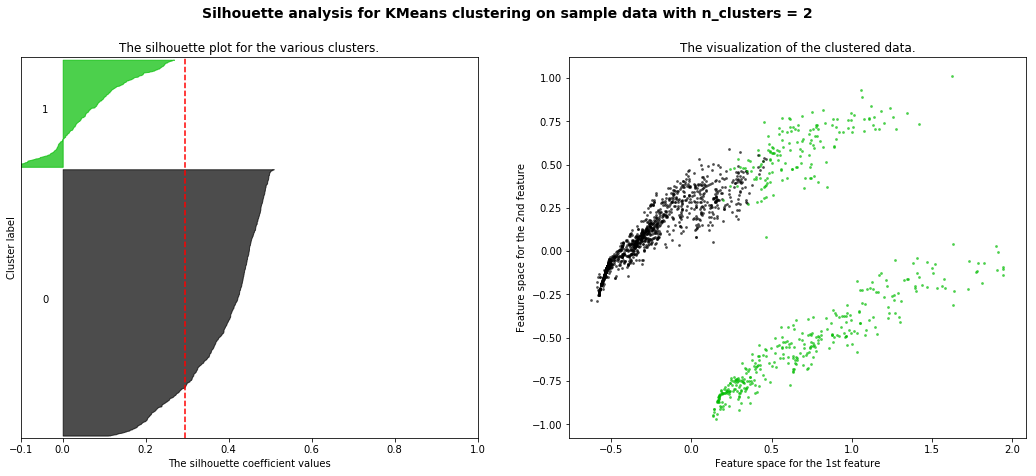

For n_clusters = 3 The average silhouette_score is : 0.3013725617864847


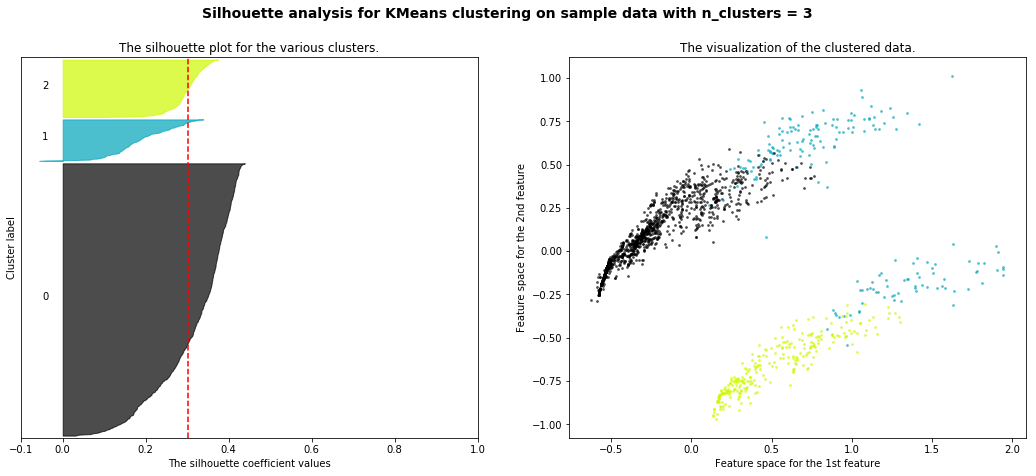

For n_clusters = 4 The average silhouette_score is : 0.24025279064171798


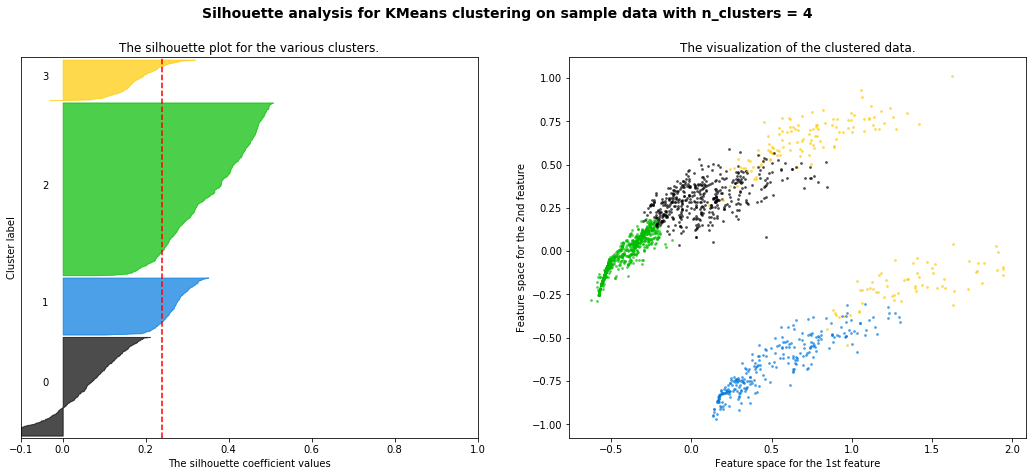

For n_clusters = 5 The average silhouette_score is : 0.21943336950507258


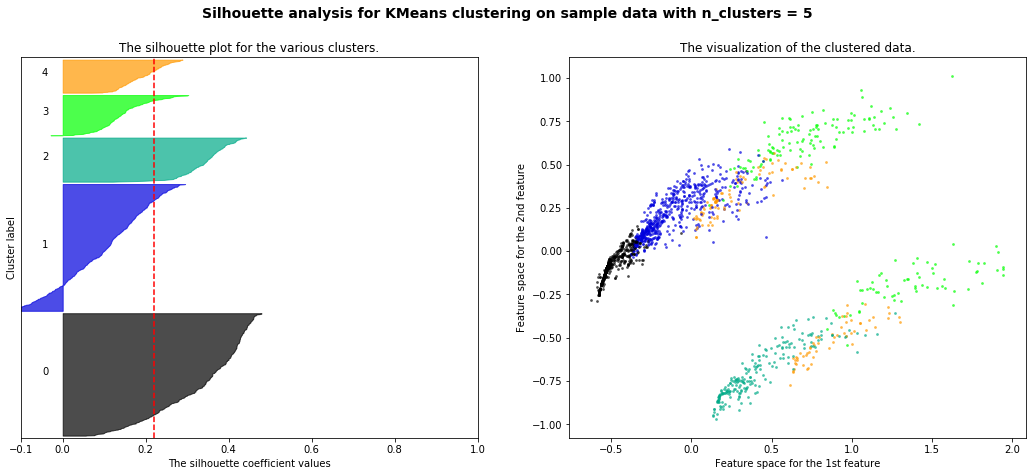

For n_clusters = 6 The average silhouette_score is : 0.18875304279685146


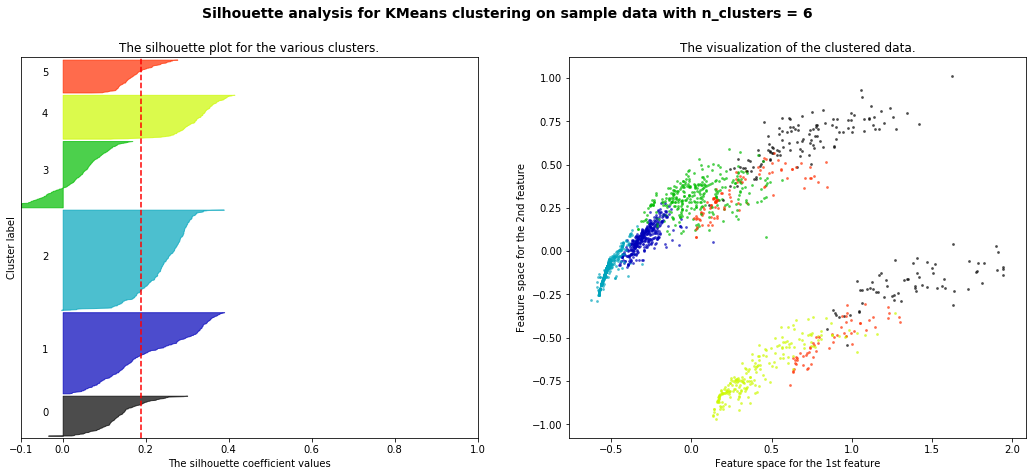

In [100]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
import numpy as np

range_n_clusters = range(2, 7)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = list(cm.spectral(np.linspace(0, (n_clusters-1)/n_clusters, n_clusters)))

    for i in range(X.shape[0]):
        ax2.scatter(X_p[i, 0], X_p[i, 1], color=colors[clusterer.labels_[i]], marker='.', s=30, lw=0, alpha=0.7,edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


Silhouette hints that 4 cluster give a good clustering

In [101]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)

In [102]:
np.bincount(clusterer.labels_)

array([453, 262, 792, 186])

Printing the average member of each clusters

In [104]:
pd.get_option("display.max_columns")
centers = pd.DataFrame(scaler.inverse_transform(clusterer.cluster_centers_), columns = relevant_cols)
centers['occurence'] = np.bincount(clusterer.labels_)
centers

,avg_wage,age_avg,alien_pt,residential_pt,commercial_pt,working_outside_pt,superior_degree_pt,idleness_pt,pop_density,Chimp_Total_Emails,...,Chimp_member_rating,mx-5,mx-5_rf,new_model,vacation,video,special_conditions,brochure,summer_deal,occurence
0,18973.504779,42.202896,0.089625,0.463509,0.024640,0.281844,0.304181,0.071746,1000.200574,9.907285,...,3.362031,0.759382,5.273559e-16,5.518764e-02,2.097130e-01,0.704194,0.315673,-1.415534e-15,6.505213e-18,453
1,18594.623000,42.029382,0.088316,0.451509,0.025130,0.279517,0.291200,0.076411,1017.616031,6.431298,...,3.194656,1.587786,2.220446e-16,2.671756e-02,2.213740e-01,0.645038,1.179389,1.000000e+00,3.816794e-03,262
2,18331.801714,42.026212,0.089066,0.443747,0.026019,0.264345,0.287956,0.081641,1095.236856,1.835859,...,2.598485,0.053030,-1.165734e-15,-6.661338e-16,9.992007e-16,0.053030,0.006313,-1.831868e-15,9.324139e-18,792
3,18733.163784,42.049305,0.092317,0.449003,0.027752,0.272096,0.294355,0.073090,1238.449247,10.376344,...,3.247312,1.715054,1.000000e+00,1.091398e+00,2.956989e-01,1.139785,1.844086,3.602151e-01,-7.589415e-19,186


## Hierachical clustering including discrete values

### Data preprocessing

In [136]:
relevant_cols = ['FRA', 'Sexe','Own(ed) a Mazda',
                 'avg_wage','age_avg', 'alien_pt', 'residential_pt','commercial_pt',
                 'working_outside_pt', 'superior_degree_pt', 'idleness_pt', 'pop_density',
                 'Chimp_Total_Emails','Chimp_opened_once', 'Chimp_opened_multi', 
                 'Chimp_not_opened', 'Chimp_clicks', 'Chimp_member_rating'
                 'mx-5', 'mx-5_rf', 'new_model','vacation', 'video','special_conditions',
                 'brochure', 'summer_deal']
scaler = MinMaxScaler()
X = scaler.fit_transform(enriched.loc[:, relevant_cols])

pca = PCA(n_components=2)
X_p = pca.fit(X).transform(X)

In [137]:
import hdbscan
import scipy as sp

clusterer = hdbscan.HDBSCAN(min_cluster_size=22, min_samples=1, metric='mahalanobis', V=np.cov(X, rowvar=False)).fit(X)

n = max(clusterer.labels_)+1
print(n)

8


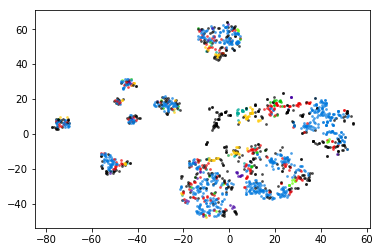

In [138]:
colors = list(cm.spectral(np.linspace(0, (n-1)/n, n)))+['black']

for i in range(X.shape[0]):
    plt.scatter(X_t[i, 0], X_t[i, 1], color=colors[clusterer.labels_[i]], marker='.', s=30, lw=0, alpha=0.7,edgecolor='k')
plt.show()